<a href="https://colab.research.google.com/github/Chitra0307/MaternAI_Infosys_Internship_Oct24/blob/Participants_Codes/MaternAI_Jaimin_Unagar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv('pregnancy risk prediction data set.csv', encoding='latin1')

###EDA PART###

In [ ]:
len(dataset)

6103

In [ ]:
dataset.head()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk


In [ ]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 524.6+ 

In [ ]:
dataset = dataset.drop(columns=['Patient ID', 'Name'])
print(dataset.head())

   Age  Body Temperature(F)   Heart rate(bpm)  Systolic Blood Pressure(mm Hg)  \
0   20                  97.5               91                             161   
1   45                  97.7               99                              99   
2   29                  98.6               84                             129   
3   26                  99.5              135                             161   
4   38                 102.5               51                             106   

   Diastolic Blood Pressure(mm Hg)  BMI(kg/m 2)  Blood Glucose(HbA1c)  \
0                              100         24.9                    41   
1                               94         22.1                    36   
2                               87         19.0                    42   
3                              101         23.7                    46   
4                               91         18.8                    38   

   Blood Glucose(Fasting hour-mg/dl)    Outcome  
0                       

Outcome
high risk    2059
mid risk     2043
low risk     2001
Name: count, dtype: int64


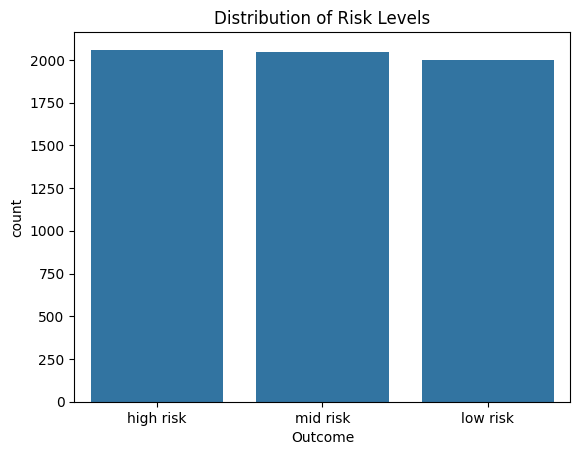

In [ ]:
print(dataset['Outcome'].value_counts())
sns.countplot(data=dataset, x='Outcome')
plt.title("Distribution of Risk Levels")
plt.show()

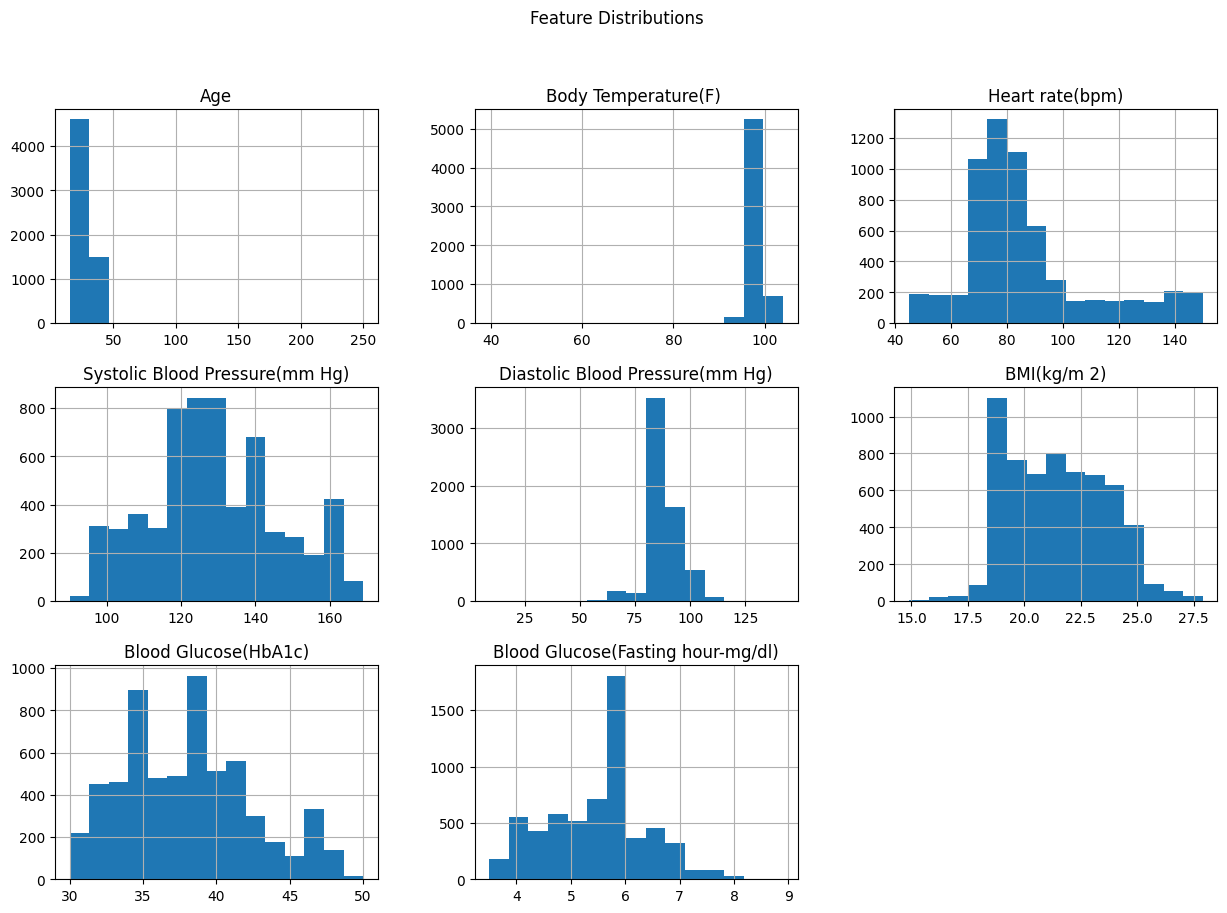

In [ ]:
# Plot histograms for all numerical columns (excluding risk columns for clarity)
dataset.drop(columns=['Outcome']).hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Feature Distributions")
plt.show()

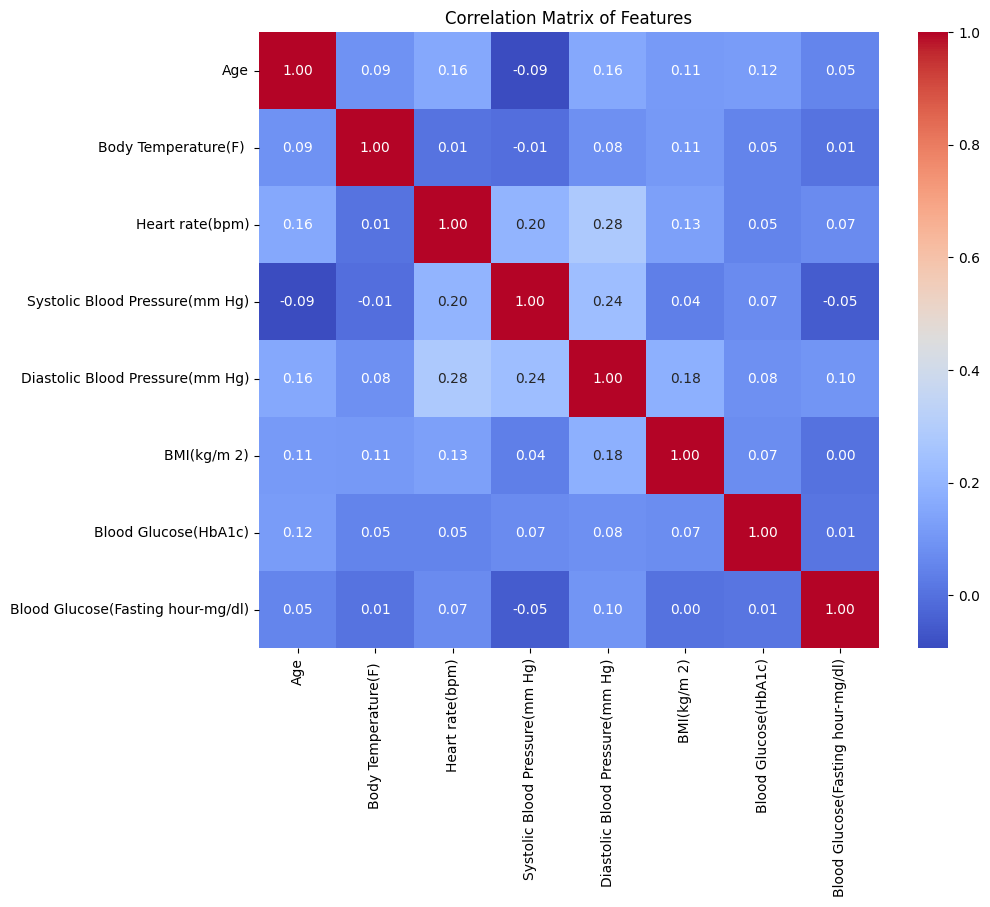

In [ ]:
# Correlation matrix for numerical features
corr_matrix = dataset.drop(columns=['Outcome']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()


In [ ]:
def plot_boxplot(data, feature):

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data[feature], orient="h")
    plt.title(f"Boxplot of {feature}")
    plt.xlabel("Value")
    plt.grid(axis='x')
    plt.show()






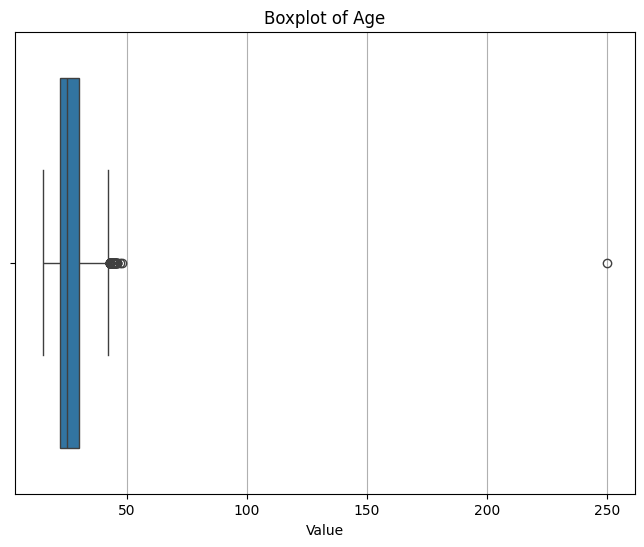

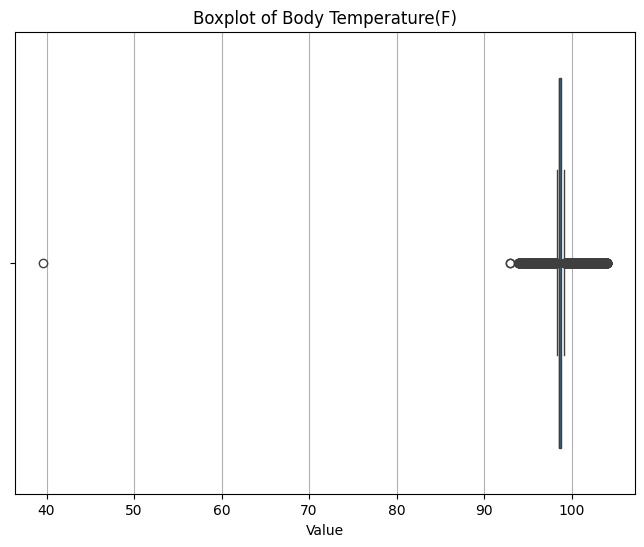

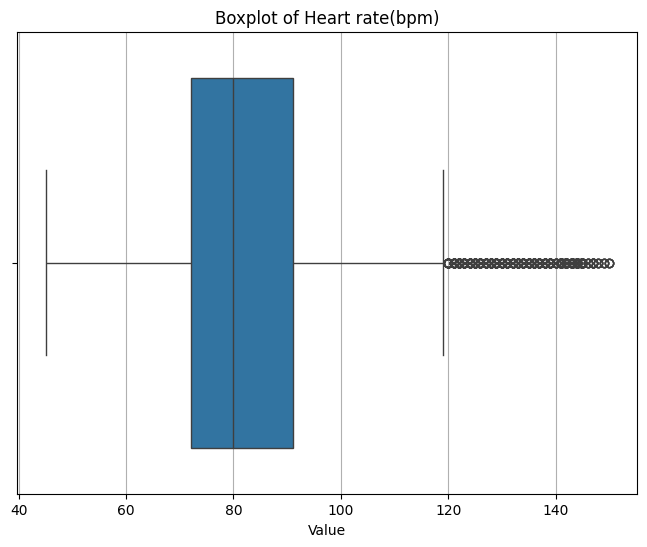

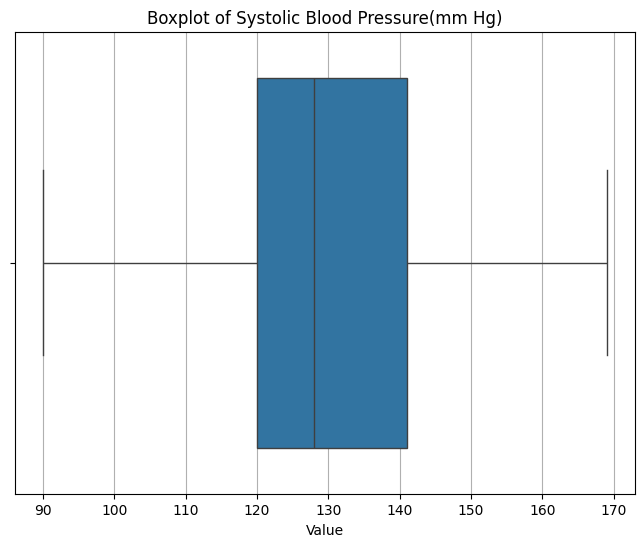

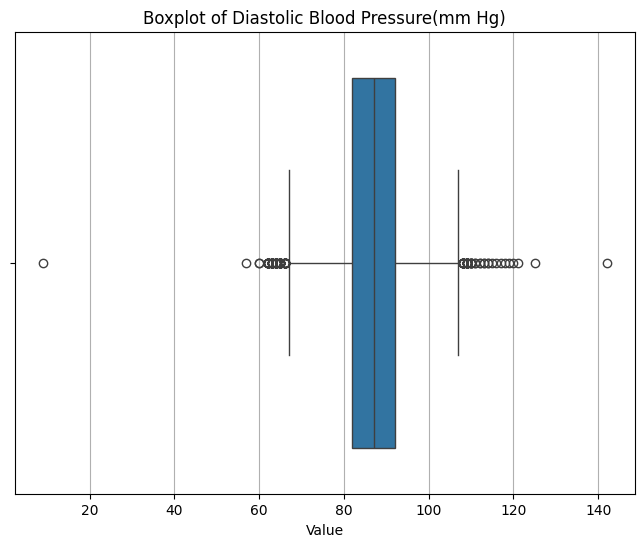

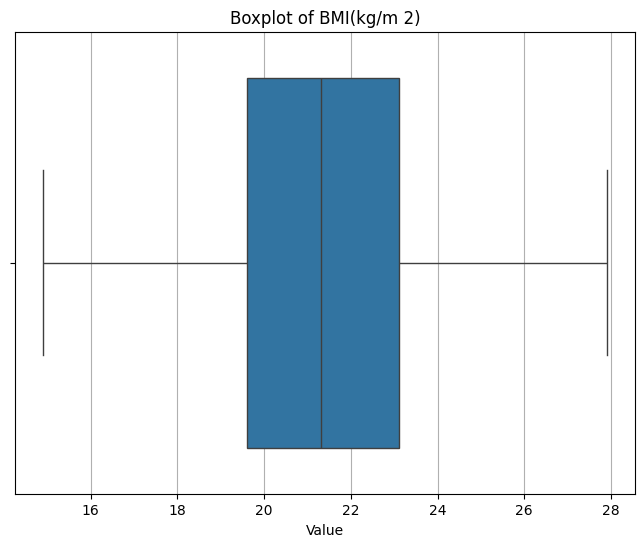

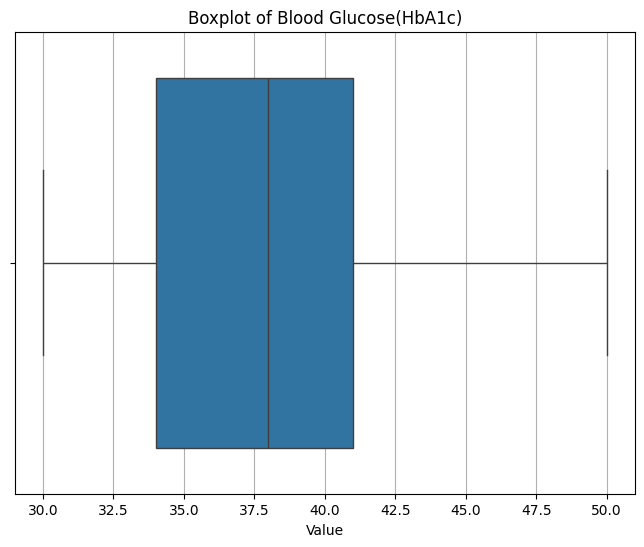

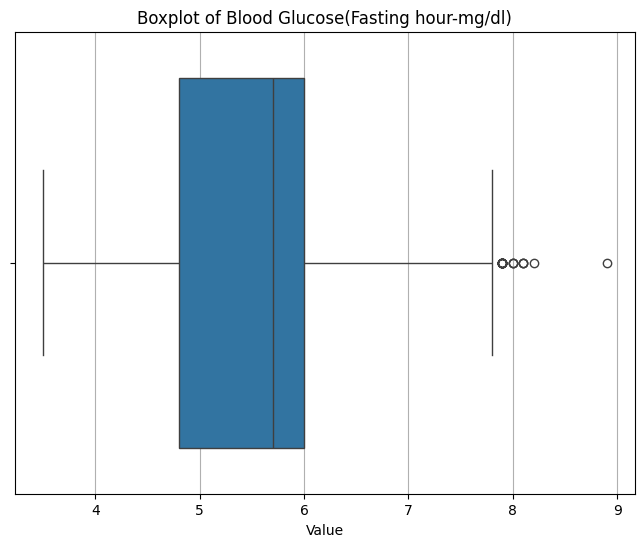

In [ ]:
dataset.columns = dataset.columns.str.strip()

# numerical features
numerical_features = [
    'Age',
    'Body Temperature(F)',  # No extra space now
    'Heart rate(bpm)',
    'Systolic Blood Pressure(mm Hg)',
    'Diastolic Blood Pressure(mm Hg)',
    'BMI(kg/m 2)',
    'Blood Glucose(HbA1c)',
    'Blood Glucose(Fasting hour-mg/dl)'
]

# Call the boxplot function for each feature
for feature in numerical_features:
    # Check if the column name exists in the DataFrame
    if feature in dataset.columns:
        plot_boxplot(dataset, feature)
    else:
        print(f"Column '{feature}' not found in the dataset. Skipping...")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=['Outcome'])  # Features
y = dataset['Outcome']  # Target variable

# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values


In [ ]:
y.head()

,Outcome
0,high risk
1,high risk
2,mid risk
3,high risk
4,high risk


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
print(y[:5])
print(y.shape)

[0 0 2 0 0]
(6103,)


In [ ]:
X.head()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl)
0,-1.005533,-0.732673,0.216534,1.844258,1.635224,1.606215,0.703543,0.326150
1,2.907025,-0.606954,0.570113,-1.753531,0.865249,0.308046,-0.432844,0.215684
2,0.402988,-0.041220,-0.092849,-0.012665,-0.033055,-1.129213,0.930820,0.988948
3,-0.066519,0.524515,2.161222,1.844258,1.763554,1.049857,1.839930,-1.109913
4,1.811509,2.410297,-1.551365,-1.347329,0.480262,-1.221939,0.021711,-1.330846


###**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Training model RandomForestClassifier  on the Training set and classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model_RandomForestClassifier= RandomForestClassifier(n_estimators=100, random_state=42)


model_RandomForestClassifier.fit(X_train, y_train)


y_pred = model_RandomForestClassifier.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9918099918099919
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       419
           1       1.00      1.00      1.00       397
           2       0.99      0.99      0.99       405

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221



## Making the Confusion Matrix FOR Randomforest model

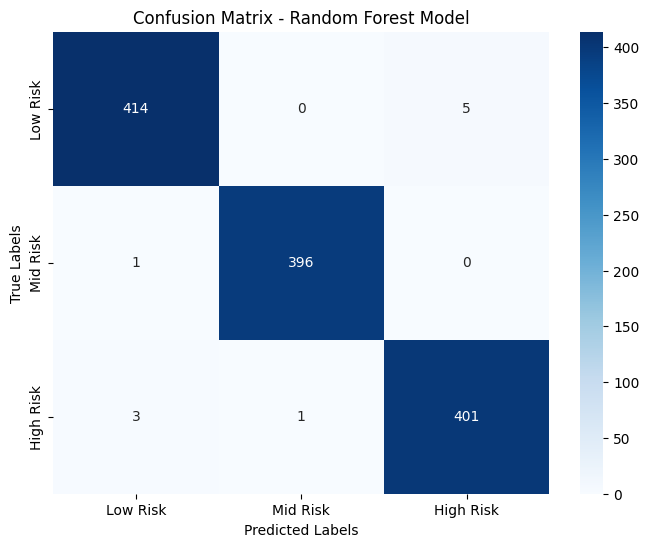

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()


## Applying k-Fold Cross Validation using Randomforestclassifier model

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_RandomForestClassifier= cross_val_score(estimator = model_RandomForestClassifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_RandomForestClassifier.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_RandomForestClassifier.std()*100))

Accuracy: 99.10 %
Standard Deviation: 0.38 %


## Training model SVC  on the Training set and classification_report

In [ ]:
from sklearn.svm import SVC


model_svc= SVC(kernel='rbf', decision_function_shape='ovr')


model_svc.fit(X_train, y_train)


y_pred_svc = model_svc.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


Accuracy: 0.9352989352989353
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       419
           1       0.95      0.99      0.97       397
           2       0.90      0.92      0.91       405

    accuracy                           0.94      1221
   macro avg       0.94      0.94      0.94      1221
weighted avg       0.94      0.94      0.94      1221

Confusion Matrix:
 [[377   6  36]
 [  1 392   4]
 [ 19  13 373]]


## Making the Confusion SVC model

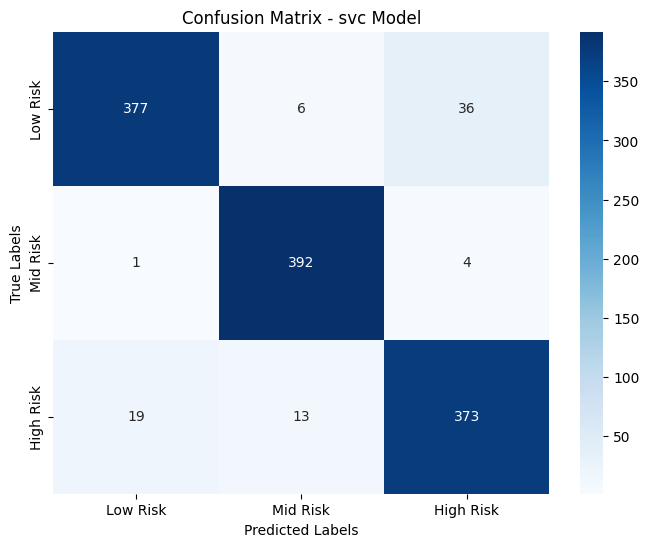

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_svc)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - svc Model")
plt.show()

## Applying k-Fold Cross Validation using SVC model

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_svc= cross_val_score(estimator = model_svc, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_svc.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_svc.std()*100))

Accuracy: 93.26 %
Standard Deviation: 0.99 %




## Training model LogisticRegression on the Training set and classification_report




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model_LR = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)


model_LR.fit(X_train, y_train)


y_pred_LR= model_LR.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_LR))
print("Classification Report:\n", classification_report(y_test, y_pred_LR))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_LR))


Accuracy: 0.5585585585585585
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.43      0.49       419
           1       0.60      0.77      0.67       397
           2       0.49      0.49      0.49       405

    accuracy                           0.56      1221
   macro avg       0.56      0.56      0.55      1221
weighted avg       0.56      0.56      0.55      1221

Confusion Matrix:
 [[180 104 135]
 [ 25 305  67]
 [110  98 197]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Making the Confusion Matrix FOR logistickRgression model

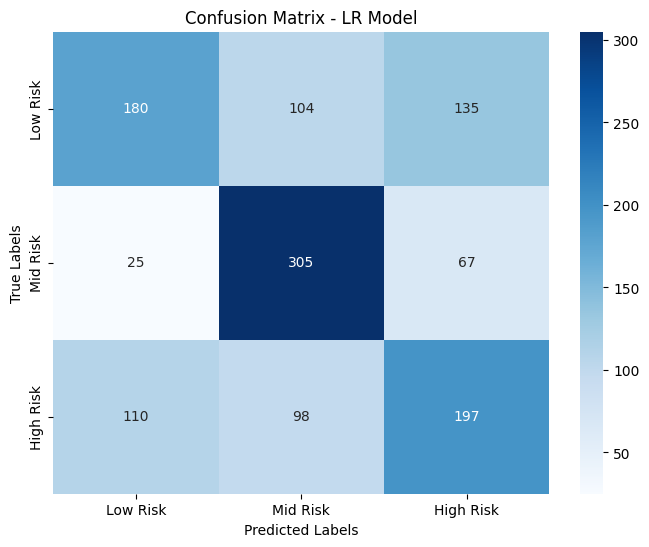

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_LR)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - LR Model")
plt.show()

## Applying k-Fold Cross Validation using logisticregression model

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_LR= cross_val_score(estimator = model_LR, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_LR.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_LR.std()*100))

Accuracy: 56.35 %
Standard Deviation: 1.98 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi



## Training model DecisionTreeClassifier on the Training set and classification_report




In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt= DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.9852579852579852
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       419
           1       0.99      0.99      0.99       397
           2       0.98      0.98      0.98       405

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

Confusion Matrix:
 [[414   0   5]
 [  1 393   3]
 [  6   3 396]]


## Making the Confusion Matrix FOR DecisionTreeClassifier model

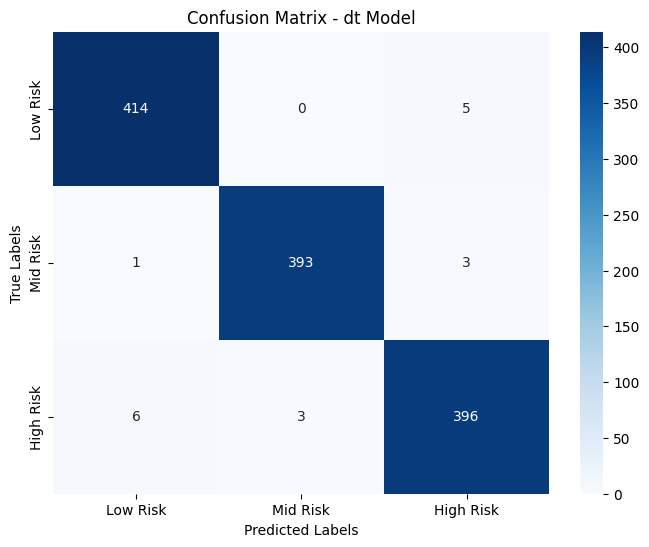

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - dt Model")
plt.show()

## Applying k-Fold Cross Validation using Decisontreeclassifier model

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_dt= cross_val_score(estimator = model_dt, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_dt.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_dt.std()*100))

Accuracy: 98.12 %
Standard Deviation: 0.70 %




## Training model XGBOOST on the Training set and classification_report




In [ ]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.9852579852579852
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       419
           1       0.99      0.99      0.99       397
           2       0.98      0.98      0.98       405

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

Confusion Matrix:
 [[414   0   5]
 [  1 393   3]
 [  6   3 396]]


## Making the Confusion Matrix FOR XGBClassifier model

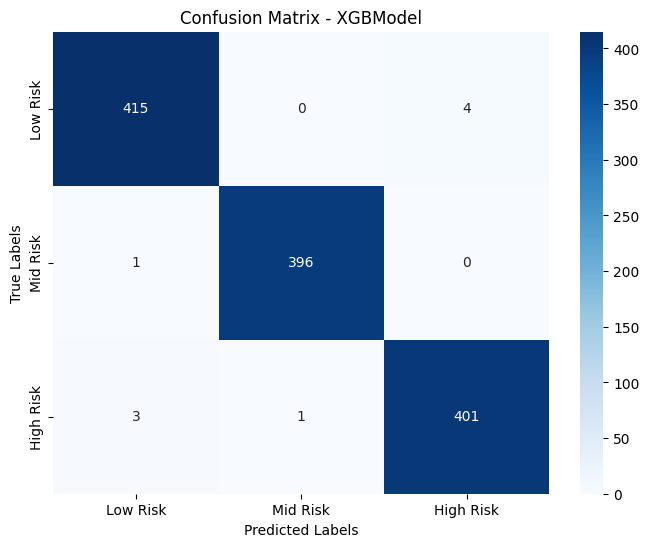

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_XGB)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - XGBModel")
plt.show()

## Applying k-Fold Cross Validation using XGB model

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_Xgb= cross_val_score(estimator = model_XGB, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_Xgb.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_Xgb.std()*100))

Accuracy: 99.14 %
Standard Deviation: 0.34 %


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assuming y_train is a pandas Series or a numpy array with integer labels

# Convert y_train and y_test to one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)


model_NN= Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),  # Dropout layer
    Dense(32, activation='relu'),  # Additional hidden layer
    Dense(16, activation='relu'),  # Additional hidden layer
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

model_NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model_NN.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4826 - loss: 0.9542 - val_accuracy: 0.7718 - val_loss: 0.6591
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7707 - loss: 0.6189 - val_accuracy: 0.8700 - val_loss: 0.5375
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8239 - loss: 0.4790 - val_accuracy: 0.8854 - val_loss: 0.4943
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8426 - loss: 0.4162 - val_accuracy: 0.8905 - val_loss: 0.5122
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3819 - val_accuracy: 0.8966 - val_loss: 0.4732
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.3663 - val_accuracy: 0.8915 - val_loss: 0.4682
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8593 - loss: 0.3383 - val_accuracy: 0.9069 - val_loss: 0.4499
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8838 - loss: 0.3108 - val_accuracy: 0.9171 - val_

## Evaluate the model on the test data

In [ ]:
loss, accuracy = model_NN.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy For Neural Network: {accuracy * 100:.2f}%")

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9646 - loss: 0.1206 
Test Accuracy For Neural Network: 96.40%


### Plot training and validation accuracy

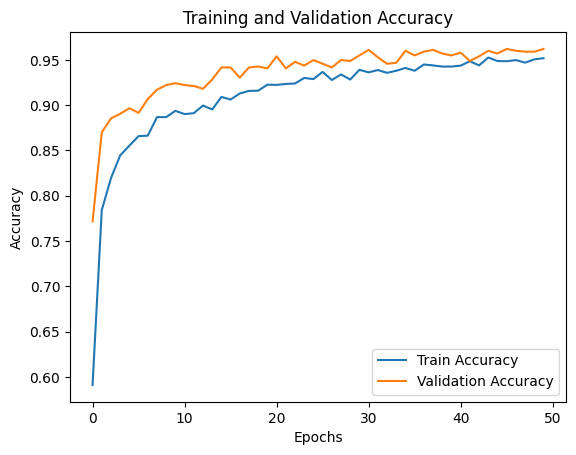

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


##Plot training and validation loss

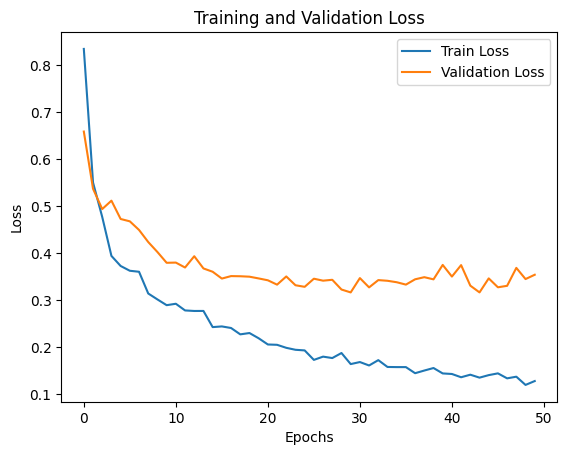

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


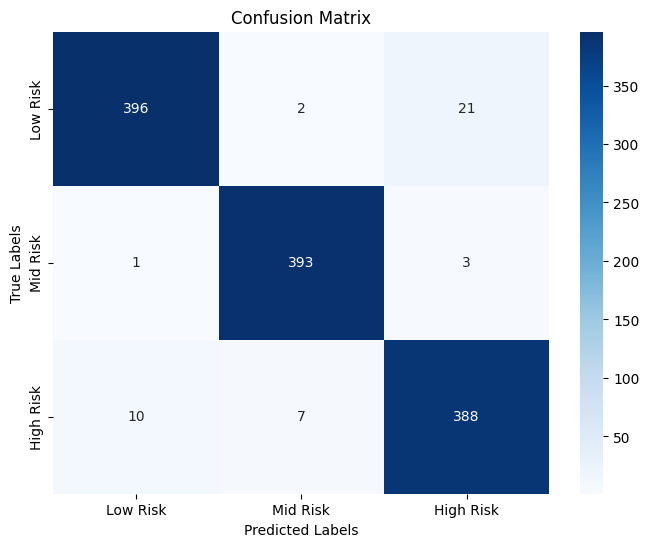

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = model_NN.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true_classes = np.argmax(y_test_encoded, axis=1)  # Convert one-hot to class indices


cm = confusion_matrix(y_true_classes, y_pred_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'Mid Risk', 'High Risk'],
            yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
